In [120]:
import pandas as pd
heart = pd.read_csv('C:\IDE\Skillfactory\EDA\\files\\heart.csv')

In [121]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [122]:
heart['old'].sum()

79

In [123]:
def trestbps_mean_func(age, sex):
    mean = 0
    if sex == 1:
        if age <= 20:
            mean = 123
        elif 21 <= age <= 30:
            mean = 126
        elif 31 <= age <= 40:
            mean = 129
        elif 41 <= age <= 50:
            mean = 135
        elif 51 <= age <= 60:
            mean = 142
        elif age >= 61:
            mean = 142
    else:
        if age <= 20:
            mean = 116
        elif 21 <= age <= 30:
            mean = 120
        elif 31 <= age <= 40:
            mean = 127
        elif 41 <= age <= 50:
            mean = 137
        elif 11 <= age <= 60:
            mean = 144
        elif age >= 61:
            mean = 159
    return mean

heart['trestbps_mean'] = heart.apply(lambda x: trestbps_mean_func(x['age'], x['sex']), axis=1)
heart['trestbps_mean'][300]

142

In [124]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [125]:
heart['restecg'].nunique()

3

<Axes: >

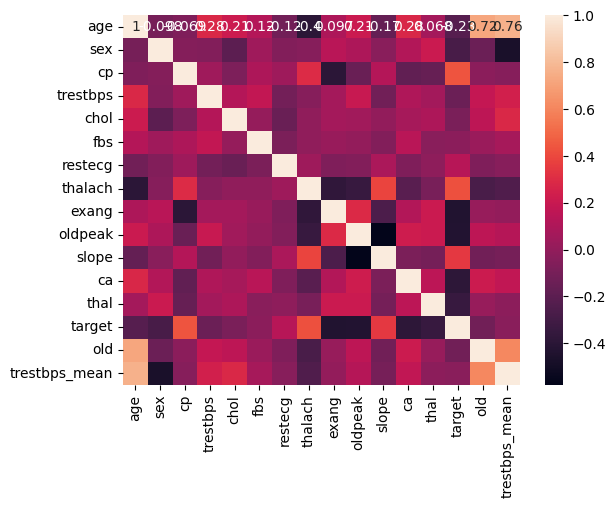

In [126]:
import seaborn as sns
sns.heatmap(heart.corr(numeric_only=True), annot=True)

In [127]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart)
heart = pd.concat([heart, type_bin], axis=1)

In [128]:
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)

In [129]:
heart.shape[1]

41

In [130]:
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4,target,old,trestbps_mean
0,63,1,145,233,1,150,0,2.3,1,1,...,0,0,0,1,0,0,0,1,1,142
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,1,0,0,1,0,129
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,1,0,0,1,0,137
3,56,1,120,236,0,178,0,0.8,1,0,...,0,0,0,0,1,0,0,1,0,142
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,1,0,0,1,0,144


In [131]:
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=heart.columns.values)
heart_r.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601,-0.455446,0.260726,-0.066007
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110,0.498835,0.439757,1.487564
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-3.200000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.400000


<Axes: >

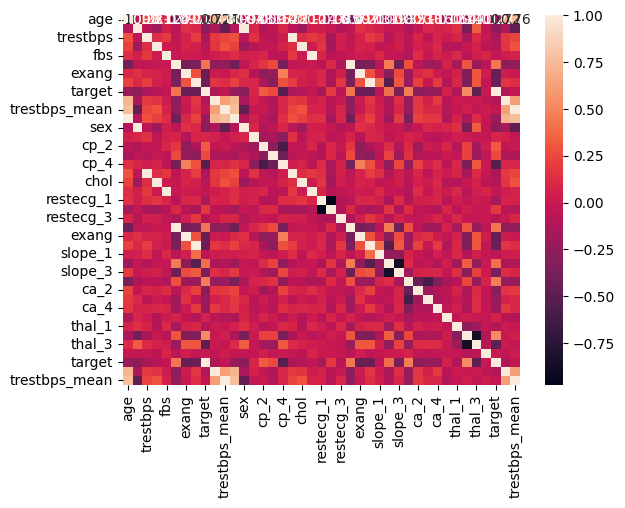

In [132]:
import seaborn as sns
sns.heatmap(heart.corr(numeric_only=True), annot=True)

In [133]:
heart.corr(numeric_only=True)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4,target,old,trestbps_mean
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.398522,0.096801,0.210013,-0.225439,0.718028,...,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779,-0.225439,0.718028,0.763055
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.044020,0.141664,0.096093,-0.280937,-0.144941,...,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093,-0.280937,-0.144941,-0.472583
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.046698,0.067616,0.193216,-0.144931,0.180631,...,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870,-0.144931,0.180631,0.236108
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.009940,0.067023,0.053952,-0.085239,0.159388,...,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127,-0.085239,0.159388,0.284474
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.008567,0.025665,0.005747,-0.028046,0.026790,...,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568,-0.028046,0.026790,0.071056
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,-0.344187,0.421741,-0.271898,...,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429,0.421741,-0.271898,-0.247197
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.378812,1.000000,0.288223,-0.436757,0.019043,...,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113,-0.436757,0.019043,0.004429
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.344187,0.288223,1.000000,-0.430696,0.159997,...,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946,-0.430696,0.159997,0.125405
target,-0.225439,-0.280937,-0.144931,-0.085239,-0.028046,0.421741,-0.436757,-0.430696,1.000000,-0.121056,...,-0.232412,-0.210615,0.066441,-0.106589,0.527334,-0.486112,-0.007293,1.000000,-0.121056,-0.030830
old,0.718028,-0.144941,0.180631,0.159388,0.026790,-0.271898,0.019043,0.159997,-0.121056,1.000000,...,0.055906,0.175160,-0.076925,0.009761,-0.004237,0.007644,-0.048408,-0.121056,1.000000,0.611538
